- Your Task : Create a comprehensive visual analysis of the car sales dataset using different plotting libraries.

Dataset Columns:

- Price: Sale price of the vehicle
- Years: Vehicle registration year
- Brand: Car brand
- Model: Car model
- Color: Vehicle color
- State/City: Sale location
- Mileage: Miles traveled
- Vin: Vehicle identification number
- Title Status: Clean title or salvage insurance
- Lot: Lot number
- Condition: Vehicle condition

Create a histogram showing the distribution of car prices.

- Create a box plot showing price distribution by brand (top 10 brands).
- Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.
- Optional : create a heatmap of average prices by brand and condition.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px
import datetime 
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D4/DAILY CHALLENGE/USA_cars_datasets.csv')
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


<Figure size 1000x600 with 0 Axes>

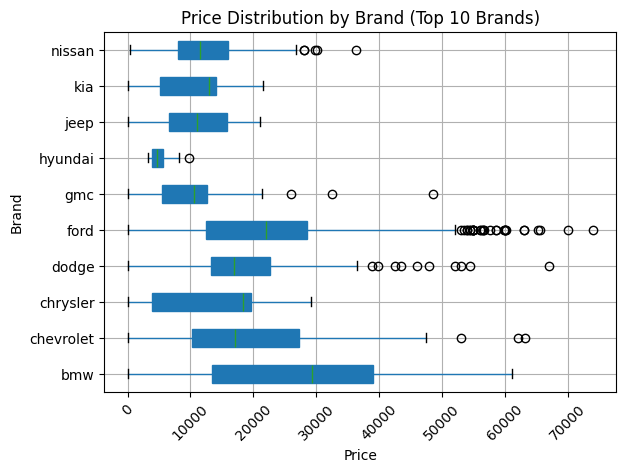

In [8]:
top_brands = df['brand'].value_counts().head(10).index

top_brands_df = df[df['brand'].isin(top_brands)]

# Create a box plot showing price distribution by brand
plt.figure(figsize=(10, 6))
top_brands_df.boxplot(column='price', by='brand', vert=False, patch_artist=True)
plt.title('Price Distribution by Brand (Top 10 Brands)')
plt.suptitle('')  # Suppress the default title generated by boxplot
plt.xlabel('Price')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.show()


In [9]:
df.columns


Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [12]:
def convert_to_hours(condition):
    if 'day' in condition:
        # Convert days to hours
        num_days = int(condition.split()[0])
        return num_days * 24
    elif 'hour' in condition:
        # Extract hours
        num_hours = int(condition.split()[0])
        return num_hours
    elif 'minute' in condition:
        # Convert minutes to hours
        num_minutes = int(condition.split()[0])
        return num_minutes / 60
    else:
        return 0  # Default for unexpected formats

# Apply the function to create the new column
df['condition_in_hours'] = df['condition'].apply(convert_to_hours)

In [16]:
# Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.
# Create buckets for conditions based on time frames

bins = [0, 1, 6, 24, 72, 168, float('inf')]  # Define time ranges in hours
labels = ['<1 Hour', '1-6 Hours', '6-24 Hours', '1-3 Days', '3-7 Days', '>7 Days']

# Create a new column with the time bucket
df['time_bucket'] = pd.cut(df['condition_in_hours'], bins=bins, labels=labels, right=False)


fig = px.scatter_3d(df, 
                    x='price', 
                    y='mileage', 
                    z='condition_in_hours', 
                    color='condition_in_hours',
                    title='3D Scatter Plot of Car Condition',
                    labels={ 'price':'Price',
                    'mileage':'Mileage', 
                    'condition_in_hours':'Condition_in_Hours',})

# Show the plot
fig.show()